In [1]:
import os, sys
import numpy as np
import torch
import torch.nn.functional as F
from torchmetrics import Accuracy
import hydra
from omegaconf import DictConfig
import wandb
from termcolor import cprint
from tqdm import tqdm

from torchvision.transforms import v2
import matplotlib.pyplot as plt

from src.datasets import ThingsMEGDataset
from src.models import BasicConvClassifier
from src.utils import set_seed

In [2]:
train_set = ThingsMEGDataset("train","data")
transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((224, 224)),
    v2.ToDtype(torch.float32, scale=True)
])
train_set.transform = transform
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
print(train_set.num_channels)

271


514
torch.Size([128, 1, 224, 224])


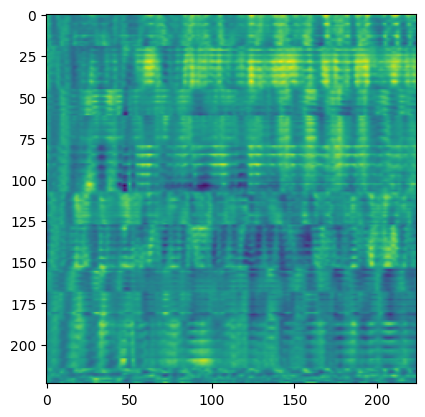

tensor([ 971,  697, 1781,  225, 1820,  831, 1372,  648,  235, 1086,  479,  662,
        1064,  843,  999,  791, 1794, 1654,  777,  982,  519, 1615, 1588, 1017,
         483,  286, 1475,  642,  558, 1678, 1111,  421,  114,  176,  101, 1554,
        1629,  681, 1272, 1738,  784, 1201,  195, 1519,  277,   87, 1494, 1138,
        1318, 1687,  462,  512,  819,   23,  289, 1383,  969, 1521, 1761,  911,
         536,  697,  524,   78, 1028,  974, 1231,  368, 1709, 1083, 1177,  368,
        1008, 1474, 1168,  710, 1516,  854,   74,  281, 1298, 1466,  775, 1217,
         595, 1056,  465,  669, 1129, 1543, 1079,   81,  445,  627, 1389, 1618,
        1708,  232, 1076, 1442,  136,  921, 1246, 1026, 1790, 1438,  646,  130,
         587,  885,  251, 1304, 1253, 1645,  153,  549, 1514,  112,  362, 1126,
        1462, 1271,  933, 1809,  560, 1606, 1254, 1278])
tensor([3, 0, 1, 0, 3, 0, 0, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 3,
        1, 2, 1, 2, 2, 3, 1, 3, 3, 3, 0, 0, 2, 3, 3, 0, 3, 0, 1

In [3]:
print(len(train_loader))

for X, y, subject_idxs in train_loader:
    print(X.shape)
    plt.imshow(X[0,0,:,:])
    plt.show()

    print(y)
    print(subject_idxs)

    break
